In [2]:
import collections
import pandas as pd
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
def open_online_csv(url, variable):
    df = pd.read_csv(url)
    df2 = df.pivot(index = 'Date_reported', columns = 'Country', values = variable)
    df2.index = pd.to_datetime(df2.index)
    df2['Date'] = df2.index
    return(df2)

df = open_online_csv(url, 'New_cases')
df.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna,Yemen,Zambia,Zimbabwe,"occupied Palestinian territory, including east Jerusalem",Date
Date_reported,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-03
2020-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-04
2020-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-05
2020-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-06
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-07


In [26]:
df2 = df

cor_df = df2.corr(method = 'pearson')  
variables = cor_df.columns

abs_rel = pd.DataFrame(index = range(len(cor_df)), columns = variables)


def get_high_cor_df(cor, cor_df):
    graph = collections.defaultdict(list)
    for i in variables:
        temp = abs(cor_df[i])
        temp2 = temp[temp > cor ].index
        cnt = 0
        for j in range(len(temp2)):
            graph[i].append(temp2[j])
    return(graph)
#     answer[i] = temp2



def dfs(var, group_var2):
    if var not in awr: # 연결된 새로운 변수 추가
        awr.append(var)
    if var in group_var2: # 리스트에 변수 값 있으면 제거
        group_var2.remove(var)
    if graph[var]:
        for var2 in graph[var]: 
            if graph[var2]:
                dfs(graph[var2].pop(), group_var2)
        if var not in awr: # 연결된 새로운 변수 추가
            awr.append(var)
    return(awr)

cor_val = 0.8
graph = get_high_cor_df(cor_val, cor_df)
groups = []
group_var = list(variables) 
while group_var:
    for i in group_var:
        if graph[i]:
            awr = []
            groups.append(dfs(i, group_var))
        else:
            groups.append([i])
            group_var.remove(i)


group_yes = []
for g in groups:
    if len(g) >1:
        group_yes.append(g)

        
cnt = 1
g_list = []
for i in group_yes:
    test = ','.join(i)
    g_list.append([f'group{cnt}',test])
    cnt += 1
    
grouped_vars = pd.DataFrame(g_list)
grouped_vars.columns = ['groups', 'variables']

In [27]:
grouped_vars

,groups,variables
0,group1,"Aruba,Curaçao"
1,group2,"Austria,Slovakia,Singapore,Liechtenstein,Latvi..."
2,group3,"India,Nepal"
3,group4,"New Zealand,Republic of Korea,Viet Nam"
4,group5,"Saint Barthélemy,Saint Martin"
5,group6,"Thailand,Malaysia"
6,group7,"Bosnia and Herzegovina,North Macedonia"
7,group8,"Kazakhstan,Uzbekistan"
8,group9,"Philippines,Jamaica"


In [22]:
group_yes[1]

['Mayotte', 'Bahamas']

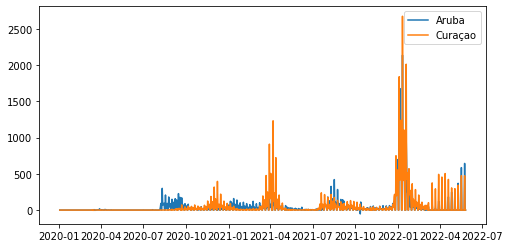

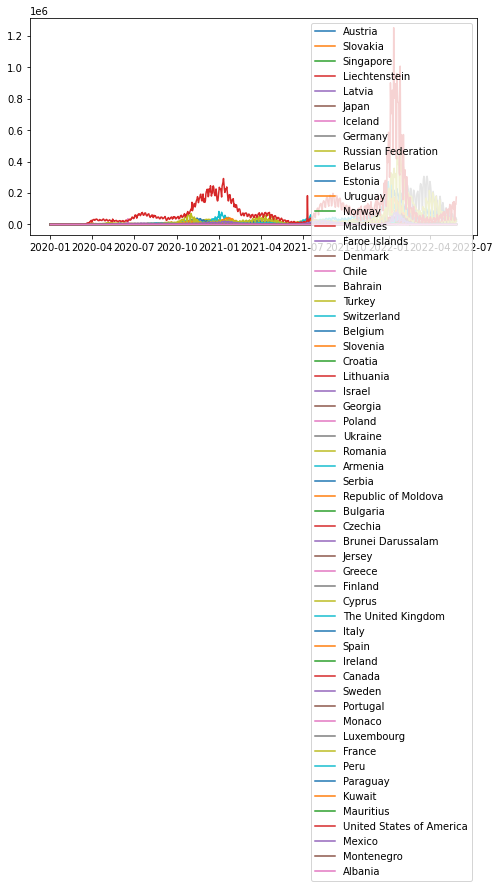

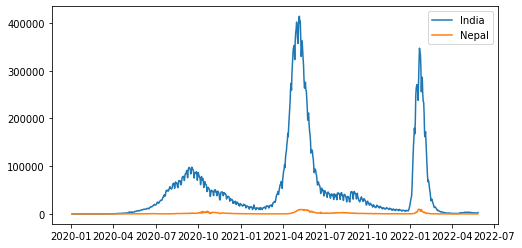

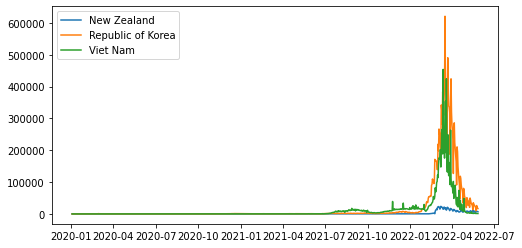

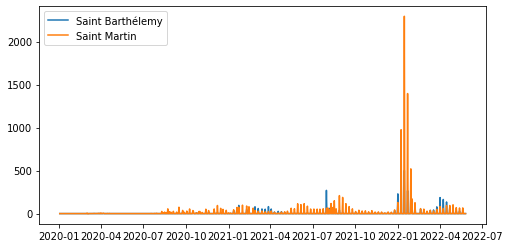

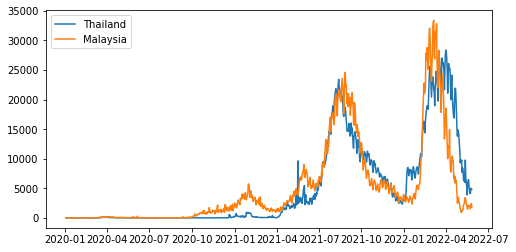

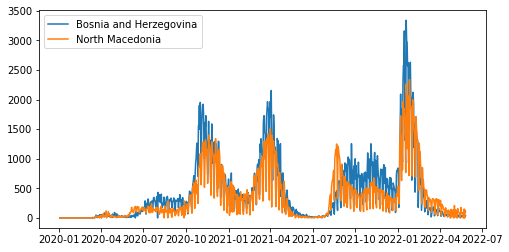

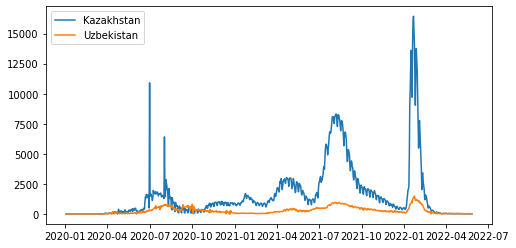

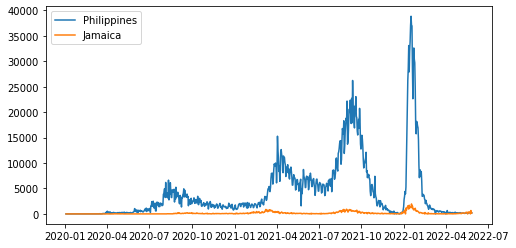

In [28]:
import matplotlib.pyplot as plt
for i in range(len(group_yes)):

    fig = plt.figure(figsize = (8, 4))
    for var in group_yes[i]:
        plt.plot(df2[var], label = f'{var}')
    plt.legend()
    plt.show()